In [134]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('retail_sales_dataset.csv')


In [3]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [46]:
total_spending_by_gender = df.groupby('Gender')['Total Amount'].sum()
gender_customer_counts = df['Gender'].value_counts()
average_total_spending = total_spending_by_gender/gender_customer_counts
average_total_spending

Gender
Female    456.549020
Male      455.428571
dtype: float64

In [45]:
products_by_gender = df.groupby(['Gender', 'Product Category'])['Quantity'].sum()
spend_on_products_by_gender = df.groupby(['Gender', 'Product Category'])['Total Amount'].sum()
proportion_spending = (spend_on_products_by_gender/total_spending_by_gender).unstack()
proportion_spending

Product Category,Beauty,Clothing,Electronics
Gender,,,
Female,0.321379,0.349059,0.329561
Male,0.307784,0.332967,0.359249


In [ ]:
total_products_by_gender = df.groupby('Gender')['Quantity'].sum()
proportion_spending = (spend_on_products_by_gender/total_spending_by_gender).unstack()
proportion_quantity = (products_by_gender/total_products_by_gender).unstack()
proportion_quantity

# weighted average age of spending on the three products by gender 

In [ ]:
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

In [117]:
total_male_spending_by_age = df_male.groupby(['Product Category','Age'])['Total Amount'].sum()
male_weighted_age = total_male_spending_by_age.mul(total_male_spending_by_age.index.get_level_values('Age'))
male_weighte_average_age=weighted_age.groupby('Product Category').sum()/total_male_spending_by_age.groupby('Product Category').sum()
male_weighte_average_age

Product Category
Beauty         38.088666
Clothing       39.203957
Electronics    43.889422
dtype: float64

In [111]:
total_female_spending_by_age = df_female.groupby(['Product Category','Age'])['Total Amount'].sum()
female_weighted_age = total_female_spending_by_age.mul(total_female_spending_by_age.index.get_level_values('Age'))
female_weighte_average_age=weighted_age.groupby('Product Category').sum()/total_female_spending_by_age.groupby('Product Category').sum()
female_weighte_average_age

Product Category
Beauty         34.960845
Clothing       35.841895
Electronics    45.854108
dtype: float64

In [120]:
price_distribution_per_category = df.groupby('Product Category')['Price per Unit'].describe()
price_distribution_per_category

,count,mean,std,min,25%,50%,75%,max
Product Category,,,,,,,,
Beauty,307.0,184.055375,194.929399,25.0,30.0,50.0,300.0,500.0
Clothing,351.0,174.287749,186.017065,25.0,30.0,50.0,300.0,500.0
Electronics,342.0,181.900585,189.049673,25.0,30.0,50.0,300.0,500.0


In [129]:
avg_num_items_bought_per_unit_price = df.groupby(['Price per Unit'])['Quantity'].mean()
avg_num_items_bought_per_unit_price

Price per Unit
25     2.485714
30     2.431694
50     2.530806
300    2.629442
500    2.487437
Name: Quantity, dtype: float64

In [132]:
avg_num_items_bought_per_unit_price = df.groupby(['Product Category'])['Quantity'].mean()
avg_num_items_bought_per_unit_price

Product Category
Beauty         2.511401
Clothing       2.547009
Electronics    2.482456
Name: Quantity, dtype: float64

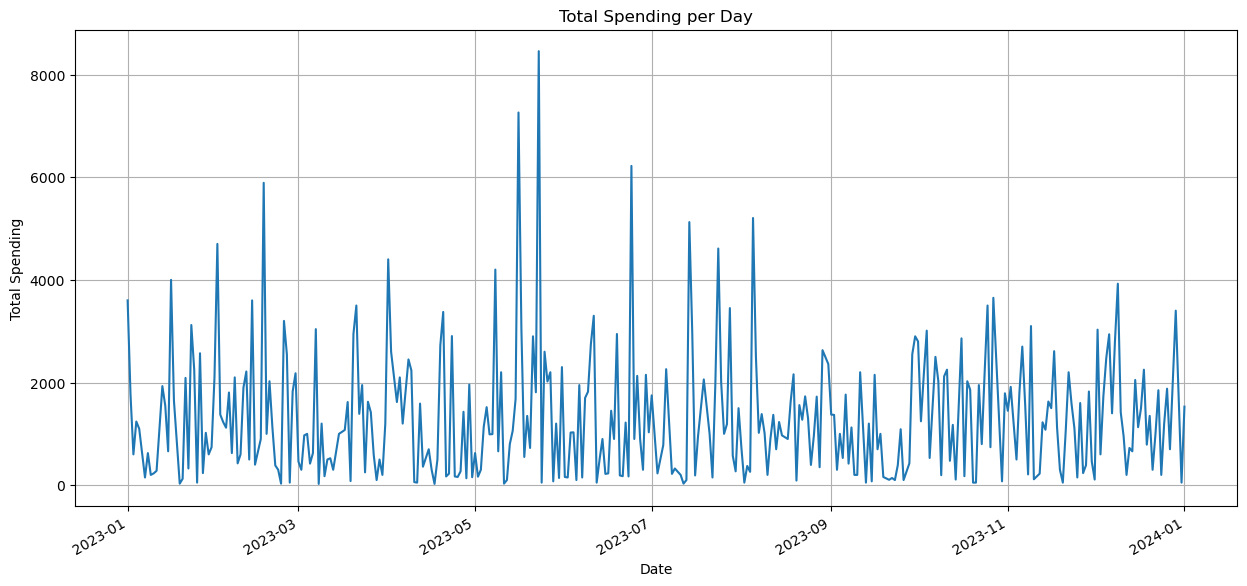

In [172]:
df['Date'] = pd.to_datetime(df['Date'])
spending_per_date = df.groupby('Date')['Total Amount'].sum()

plt.figure(figsize=(15, 7))
spending_per_date.plot()
plt.title('Total Spending per Day')
plt.xlabel('Date')
plt.ylabel('Total Spending')
plt.grid(True)
plt.show()


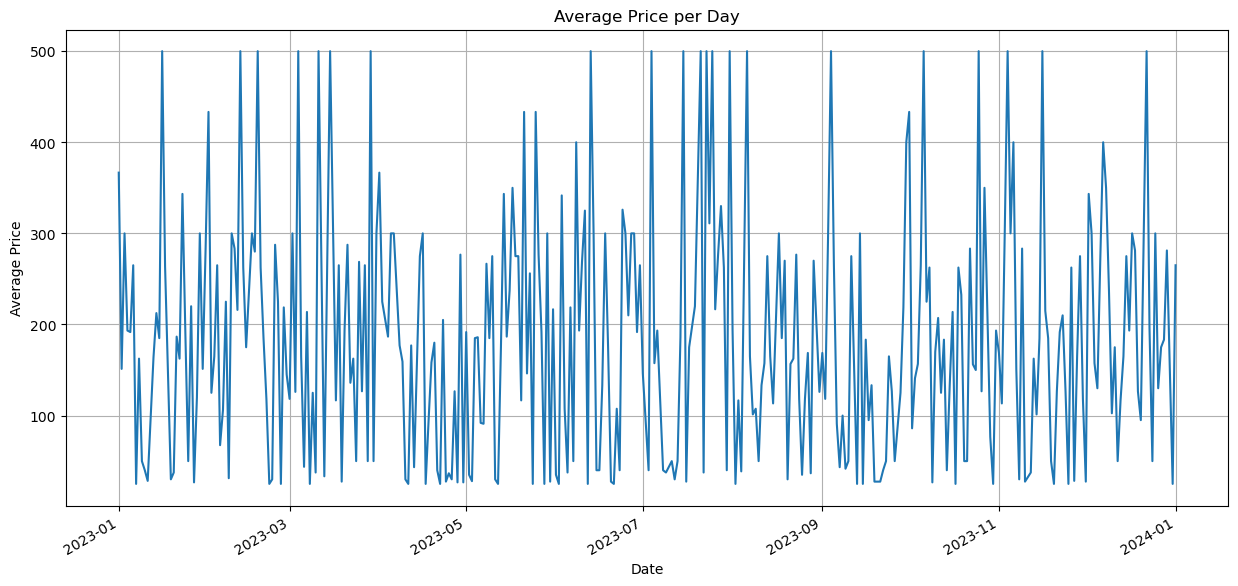

In [173]:

average_price_per_day = df.groupby('Date')['Price per Unit'].mean()

plt.figure(figsize=(15, 7))
average_price_per_day.plot()
plt.title('Average Price per Day')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


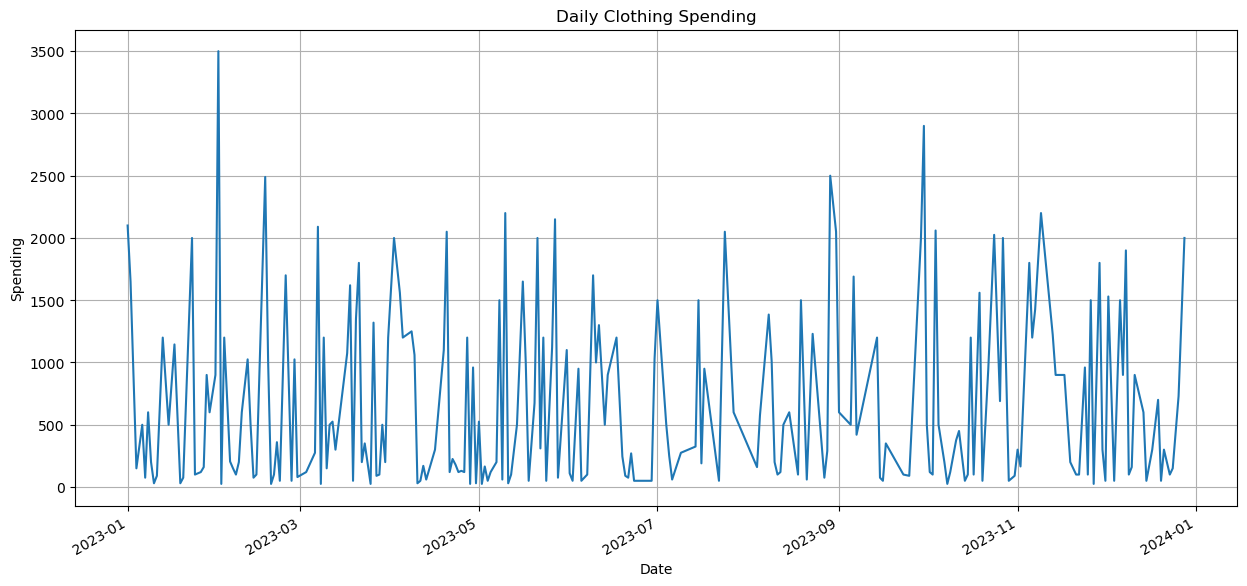

In [175]:
df_clothing=df[df['Product Category'] == 'Clothing']
df_electronics=df[df['Product Category'] == 'Electronics']
df_beauty=df[df['Product Category'] == 'Beauty']

clothing_spending_per_date = df_clothing.groupby('Date')['Total Amount'].sum()
plt.figure(figsize=(15, 7))
clothing_spending_per_date.plot()
plt.title('Daily Clothing Spending')
plt.xlabel('Date')
plt.ylabel('Spending')
plt.grid(True)
plt.show()

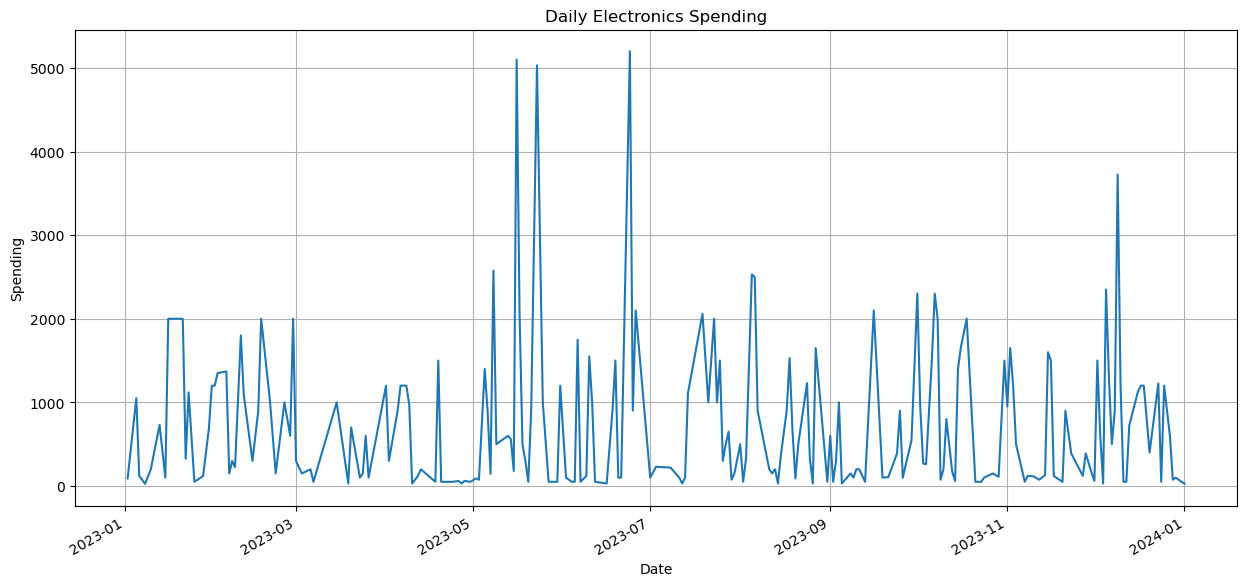

In [176]:
electronics_spending_per_date = df_electronics.groupby('Date')['Total Amount'].sum()
plt.figure(figsize=(15, 7))
electronics_spending_per_date.plot()
plt.title('Daily Electronics Spending')
plt.xlabel('Date')
plt.ylabel('Spending')
plt.grid(True)
plt.show()

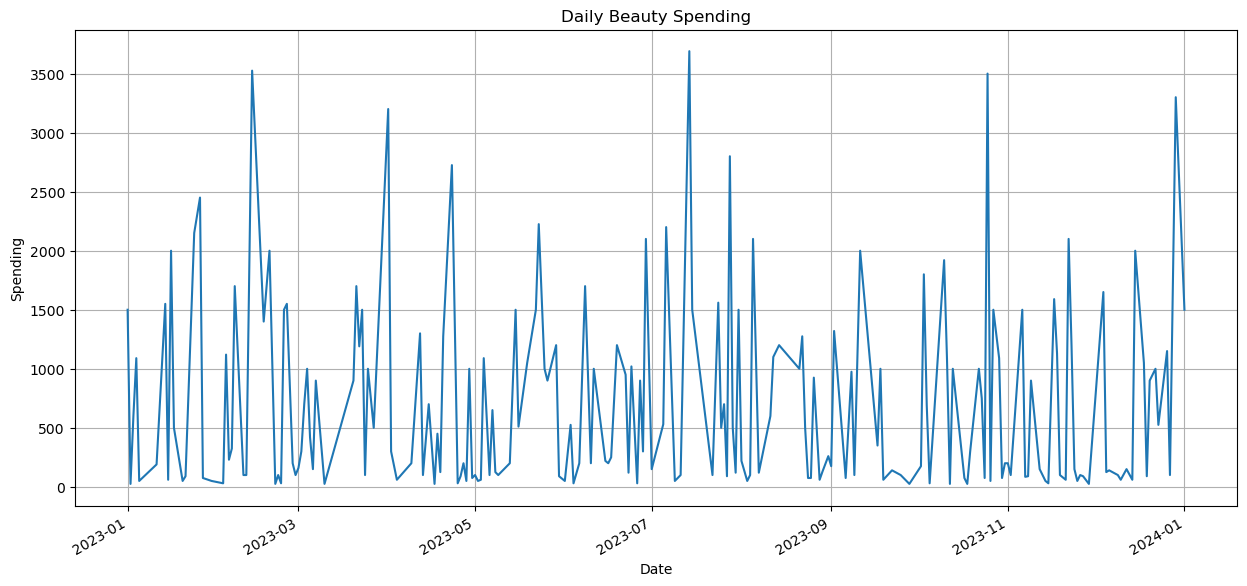

In [177]:
beauty_spending_per_date = df_beauty.groupby('Date')['Total Amount'].sum()
plt.figure(figsize=(15, 7))
beauty_spending_per_date.plot()
plt.title('Daily Beauty Spending')
plt.xlabel('Date')
plt.ylabel('Spending')
plt.grid(True)
plt.show()